<h2><a href="https://leetcode.com/problems/find-eventual-safe-states">802. Find Eventual Safe States</a></h2><h3>Medium</h3><hr><p>There is a directed graph of <code>n</code> nodes with each node labeled from <code>0</code> to <code>n - 1</code>. The graph is represented by a <strong>0-indexed</strong> 2D integer array <code>graph</code> where <code>graph[i]</code> is an integer array of nodes adjacent to node <code>i</code>, meaning there is an edge from node <code>i</code> to each node in <code>graph[i]</code>.</p>

<p>A node is a <strong>terminal node</strong> if there are no outgoing edges. A node is a <strong>safe node</strong> if every possible path starting from that node leads to a <strong>terminal node</strong> (or another safe node).</p>

<p>Return <em>an array containing all the <strong>safe nodes</strong> of the graph</em>. The answer should be sorted in <strong>ascending</strong> order.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="Illustration of graph" src="https://s3-lc-upload.s3.amazonaws.com/uploads/2018/03/17/picture1.png" style="height: 171px; width: 600px;" />
<pre>
<strong>Input:</strong> graph = [[1,2],[2,3],[5],[0],[5],[],[]]
<strong>Output:</strong> [2,4,5,6]
<strong>Explanation:</strong> The given graph is shown above.
Nodes 5 and 6 are terminal nodes as there are no outgoing edges from either of them.
Every path starting at nodes 2, 4, 5, and 6 all lead to either node 5 or 6.</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> graph = [[1,2,3,4],[1,2],[3,4],[0,4],[]]
<strong>Output:</strong> [4]
<strong>Explanation:</strong>
Only node 4 is a terminal node, and every path starting at node 4 leads to node 4.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == graph.length</code></li>
	<li><code>1 &lt;= n &lt;= 10<sup>4</sup></code></li>
	<li><code>0 &lt;= graph[i].length &lt;= n</code></li>
	<li><code>0 &lt;= graph[i][j] &lt;= n - 1</code></li>
	<li><code>graph[i]</code> is sorted in a strictly increasing order.</li>
	<li>The graph may contain self-loops.</li>
	<li>The number of edges in the graph will be in the range <code>[1, 4 * 10<sup>4</sup>]</code>.</li>
</ul>


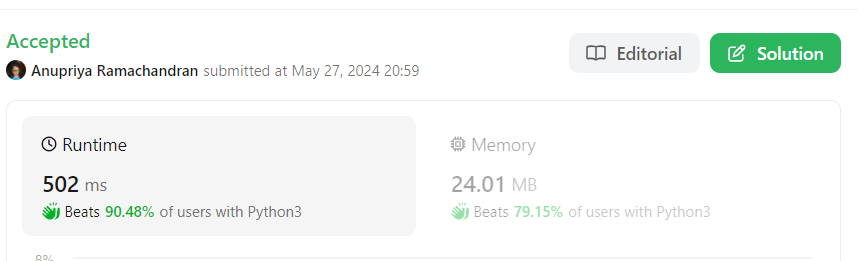

In [ ]:
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        
        # Checking if the nodes are either directed towards or in a cycle are not Safe Nodes
        def dfs_check(graph, node, visit, pathvis, check_nodes):
            visit[node] = 1
            pathvis[node] = 1
            check_nodes[node] = 0

            for child in graph[node]:
                if visit[child] == 0: 
                   if dfs_check(graph, child, visit, pathvis, check_nodes) == True: # this returns true if there is cycle 
                        check_nodes[node]= 0  # Hence we mark that nodes as not a Safe Node
                        return True
                else:
                    if pathvis[child] == 1:
                        check_nodes[node] = 0
                        return True

            check_nodes[node] = 1   # Since if there is a cycle , itw will never reach here , hence whoever passes from here are safe nodes
            pathvis[node] = 0
            return False

        visit = [0]* len(graph)
        pathvis = [0]* len(graph)
        check_nodes = [0]*len(graph)  # for storing safe nodes

        for i in range(len(graph)):
            if visit[i] == 0:
                dfs_check(graph, i, visit, pathvis, check_nodes)

        safenodes = [ i for i in range(len(check_nodes)) if check_nodes[i] == 1]
        return safenodes
